In [4]:
import os
from datetime import datetime as dt 
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import matplotlib.dates as mdates

In [5]:
current_path = os.getcwd()
# source: https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019/discussion?sort=hotness
data3 = pd.read_csv(current_path + "/spotify-2010-2019.csv")

In [6]:
data3.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [7]:
data3 = data3.iloc[:-3]
# the last 3 rows were NaNs 

In [8]:
data3['year released'] = data3['year released'].astype(int)
data3['top year'] = data3['top year'].astype(int)
# Converting them to ints as they were floats previously

In [9]:
genre_mapping = {
    'pop': [
        'pop', 'pop soul', 'bedroom pop', 'colombian pop', 'acoustic pop', 'indie pop', 'art pop', 'baroque pop', 
        'austrian pop', 'irish pop', 'french indie pop', 'german pop', 'canadian pop', 'danish pop', 'social media pop',
        'bubblegum dance', 'candy pop', 'barbadian pop', 'israeli pop', 'belgian pop', 'australian pop', 
    ],
    'hip hop': [
        'hip hop', 'atl hip hop', 'detroit hip hop', 'asian american hip hop', 'east coast hip hop', 'canadian hip hop', 
        'uk hip hop', 'conscious hip hop', 'gangster rap', 'australian hip hop', 'new jersey rap', 'ghanaian hip hop', 
        'melodic rap', 'chicago rap', 'london rap', 'florida rap', 'emo rap', 'kentucky hip hop', 'dfw rap', 
        'hawaiian hip hop', 'dirty south rap', 'memphis hip hop', 'north carolina hip hop', 'nyc rap', 'uk drill', 
        'lgbtq+ hip hop', 'dutch hip hop','argentine hip hop','ohio hip hop'
    ],
    'rock': [
        'modern alternative rock', 'indie rock', 'garage rock', 'alternative rock', 'classic rock', 'celtic rock',
        'alternative metal', 'modern rock'
    ],
    'r&b': ['alternative r&b', 'contemporary r&b', 'neo soul', 'canadian contemporary r&b'],
    'electronic': [
        'edm', 'big room', 'disco house', 'romanian house', 'deep house', 'bass trap', 'electro', 'deep disco house', 'bubblegum dance',
        'electropop', 'destroy techno', 'complextro', 'electro house','house'
    ],
    'rap': ['rap', 'comedy rap', 'cali rap', 'social media pop', 'alt z'],
    'indie': [
        'indietronica', 'aussietronica', 'icelandic indie', 'canadian indie', 'indie folk', 'eau claire indie', 'indie poptimism', 
        'indie pop rap', 'australian indie', 'la indie', 'new french touch'
    ],
    'dance': [
        'dance pop', 'modern folk rock', 'dancefloor dnb', 'alternative dance', 'downtempo', 'tropical house', 'chill pop'
    ],
    'folk': ['neo mellow', 'folk-pop', 'modern folk rock'],
    'house': ['deep groove house', 'dutch house', 'tropical house'],
    'soul': ['british soul', 'pop soul'],
    'country': ['contemporary country', 'boy band'],
    'latin': ['latin'],
    'grime': ['grime', 'afroswing'],
    'afrofuturism': ['afrofuturism', 'afro dancehall'],
    'dark clubbing': ['dark clubbing'],
    'reggae fusion': ['reggae fusion'],
    'comic': ['comic'],
    'black americana': ['black americana'],
    'idol': ['idol'],
    'talent show': ['talent show'],
    'hollywood': ['hollywood']
}
# the goal is to reduce the number of genres and justifiably inflate the size of parent genres

In [10]:
def replace_genres(genre, mapping):
    for key, values in mapping.items():
        if genre in values:
            return key
    return genre  

data3['top genre'] = data3['top genre'].apply(lambda x: replace_genres(x, genre_mapping))

# mapping of genres

In [11]:
print(data3['top genre'].unique())

['dance' 'pop' 'hip hop' 'pop rap' 'electronic' 'lilith' 'folk'
 'reggae fusion' 'idol' 'talent show' 'rock' 'indie' 'grime' 'house'
 'country' 'australian dance' 'soul' 'permanent wave' 'hip pop' 'g funk'
 'french shoegaze' 'r&b' 'k-pop' 'brostep' 'metropopolis' 'emo'
 'adult standards' 'comic' 'irish singer-songwriter' 'san diego rap'
 'australian psych' 'rap' 'latin' 'basshall' 'hollywood' 'afrofuturism'
 'black americana' 'alternative pop rock' 'dark clubbing']


In [12]:
genre_counts = data3['top genre'].value_counts()

# getting the valid genres with equal to or more than 10 songs
valid_genres = genre_counts[genre_counts >= 10].index

# filtering those out with less than 10 songs
filtered_data = data3[data3['top genre'].isin(valid_genres)]

In [13]:
genre_counts = filtered_data['top genre'].value_counts()
print(genre_counts)

top genre
dance         373
hip hop       180
pop           152
electronic     53
rock           39
country        35
indie          23
folk           19
r&b            18
rap            14
grime          10
latin          10
Name: count, dtype: int64


In [18]:
filtered_data.rename(columns={"top genre": "top-genre"}, inplace=True)

/var/folders/5d/08v816wn261ctmm7jzly1z6w0000gn/T/ipykernel_57895/1252915342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={"top genre": "top-genre"}, inplace=True)


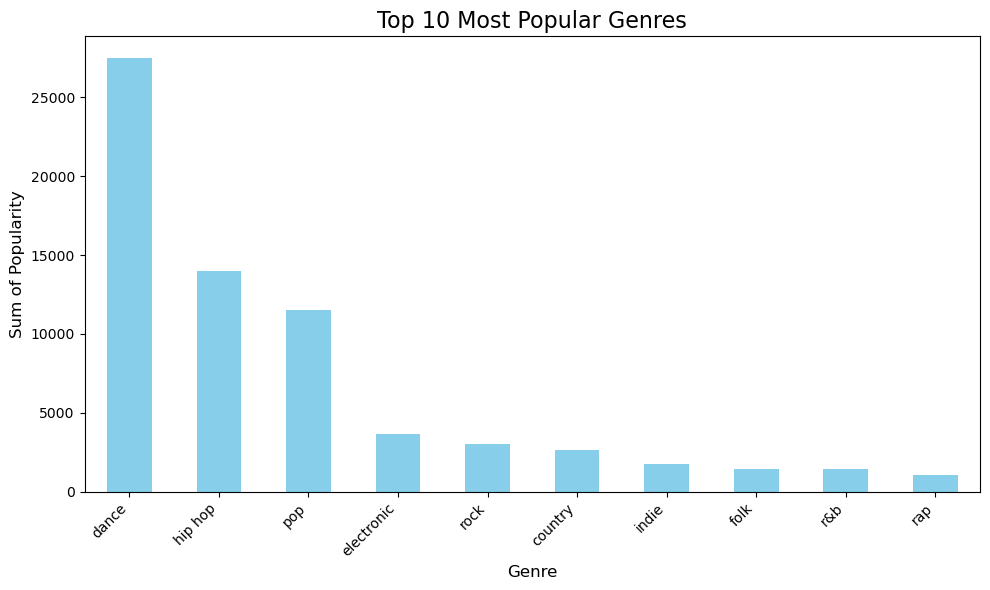

In [16]:

genre_popularity = data3.groupby('top genre')['pop'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_popularity.head(10).plot(kind='bar', color='skyblue')


plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sum of Popularity', fontsize=12)


plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Range of 'pop' column: 60.0
pop max is: 95.0
pop min is: 35.0


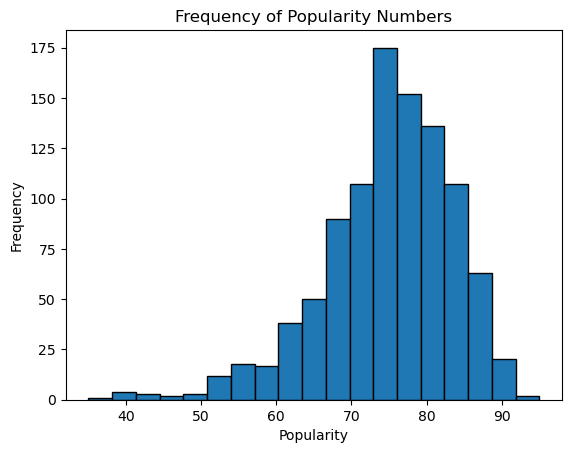

In [24]:
pop_range = data3['pop'].max() - data3['pop'].min()

# Output the range
print("Range of 'pop' column:", pop_range)

pop_max = data3['pop'].max()
pop_min = data3['pop'].min()

print ("pop max is:", pop_max)
print ("pop min is:", pop_min)

# 



# Define the number of bins (optional: adjust based on how granular you want the bins)
num_bins = 20

# Create the histogram
plt.hist(data3['pop'], bins=np.linspace(pop_min, pop_max, num_bins), edgecolor='black')

# Adding titles and labels
plt.title('Frequency of Popularity Numbers')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Display the graph
plt.show()


## This is a candidate. 
The reason behind the summation of popularity is that average popularity can be misleading. A niche genre might have just a few songs yet its popularity might be high, and graphing the average will artificially inflate its popularity. 

In [ ]:

specific_genres = ['dance', 'hip hop', 'pop', 'electronic', 'rock', 'country', 'indie', 'folk', 'r&b', 'rap']


filtered_data = data3[data3['top genre'].isin(specific_genres)]

average_popularity = filtered_data.groupby('top genre')['pop'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_popularity.plot(kind='bar', color='lightgreen')

plt.title('Average Popularity for Specified Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:

genre_popularity = data3.groupby('artist')['pop'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_popularity.head(10).plot(kind='bar', color='skyblue')


plt.title('Top 10 Most Popular Artists', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sum of Popularity', fontsize=12)


plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data3.to_csv(current_path + '/filtered.csv') 

## Perhaps we can color code the barchart above by genres.